In [1]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
from shutil import copyfile

%matplotlib inline

In [2]:
df = pd.DataFrame()
for folder in glob.glob('*_input_*/'):
    sc_file = folder + "score.sc"
    if os.path.exists(sc_file):
        dsc = pd.read_csv(sc_file, sep='\s+', header=1)
        df = pd.concat([df,dsc])
df = df.reset_index()
print(df)

       index  SCORE:  total_score  angle_constraint  atom_pair_constraint  \
0          0  SCORE:     -919.950               0.0                 0.062   
1          1  SCORE:     -903.334               0.0                 0.047   
2          2  SCORE:     -902.313               0.0                 0.008   
3          3  SCORE:     -901.248               0.0                 0.002   
4          4  SCORE:     -901.728               0.0                 0.083   
...      ...     ...          ...               ...                   ...   
11109      0  SCORE:     -897.796               0.0                 0.000   
11110      1  SCORE:     -891.857               0.0                 0.000   
11111      2  SCORE:     -898.629               0.0                 0.001   
11112      3  SCORE:     -903.291               0.0                 0.000   
11113      4  SCORE:     -905.636               0.0                 0.000   

       dihedral_constraint  dslf_fa13   fa_atr   fa_dun  fa_elec  ...  \
0 

19.599319776858017


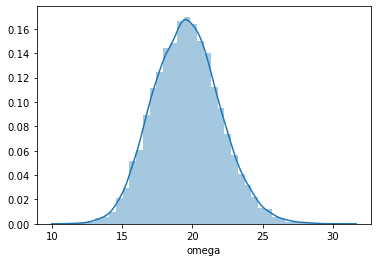

In [3]:
sns.distplot(df["omega"], bins=40)
print(df['omega'].mean())

-6.526783696238978


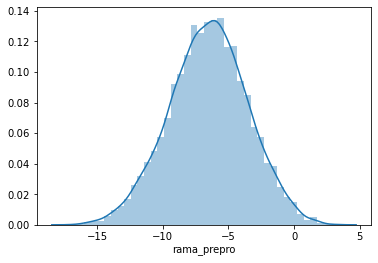

In [4]:
sns.distplot(df["rama_prepro"], bins=40)
print(df['rama_prepro'].mean())

-131.54222215224038


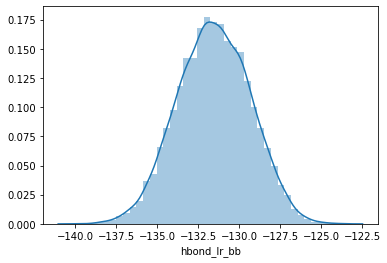

In [5]:
sns.distplot(df["hbond_lr_bb"], bins=40)
print(df['hbond_lr_bb'].mean())

-898.1567146841822


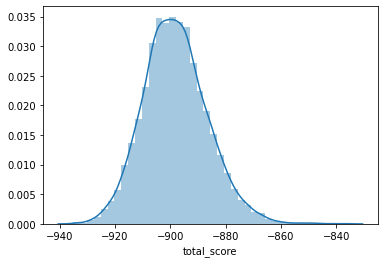

In [6]:
sns.distplot(df["total_score"], bins=40)
print(df['total_score'].mean())

-65.94081086917402


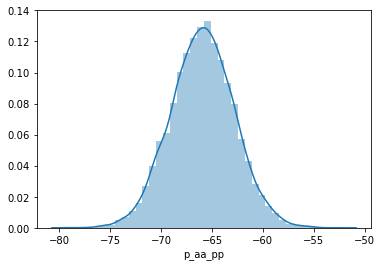

In [7]:
sns.distplot(df["p_aa_pp"], bins=40)
print(df['p_aa_pp'].mean())

In [9]:
worst_torsions = df.loc[(df['omega'] > 20.0) & (df['hbond_lr_bb'] > -83)]
for model in worst_torsions.description:
    folder_id = "_".join(model.split("_")[0:6])
    source = folder_id + "/" + model + ".pdb"
    target = "worst/" + model + ".pdb"
    copyfile(source, target)

In [10]:
sns.distplot(best_torsions["hbond_sc"], bins=40)
print(best_torsions['hbond_sc'].mean())

NameError: name 'best_torsions' is not defined

In [8]:
for index, row in df.iterrows():
#for model in df.description:
    model = row["description"]
    HBNet = []
    energy_table = []
    labels = []
    tot_energy = 0
    mean_energy = 0
    tot_hbond = 0
    mean_hbond = 0
    folder_id = "_".join(model.split("_")[0:4]) + "_" + model.split("_")[4][3:]
    pdb_file = folder_id + "/" + model + ".pdb"
    with open(pdb_file, 'r') as pdb_f:
        for line in pdb_f:
            if "HBNet" in line:
                HBNet.append(int(line.split()[2]))
            elif line.startswith("#BEGIN_POSE_ENERGIES_TABLE"):
                labels = pdb_f.readline().strip().split(' ')
                next(pdb_f)
                next(pdb_f)
                for line in pdb_f:
                    if line.startswith("#END_POSE_ENERGIES_TABLE"):
                        break
                    energy_table.append(line.strip().split(' '))
    de = pd.DataFrame(energy_table, columns=labels)
    de['label'] = de['label'].str.replace('HIS_D', 'HIS')
    new_c = de['label'].str.split('_', expand=True)
    de['resn'] = new_c[1].astype(int)
    HBNet_DE = []
    for item in HBNet:
        if item != 26 and item != 114:
            HBNet_DE.append(item)
    tot_energy = de['total'].loc[de['resn'].isin(HBNet)].astype(float).sum()
    mean_energy = tot_energy/len(HBNet)
    tot_hbond = de['hbond_sc'].loc[de['resn'].isin(HBNet)].astype(float).sum()
    mean_hbond = tot_hbond/len(HBNet)
    tot_energy_DE = de['total'].loc[de['resn'].isin(HBNet_DE)].astype(float).sum()
    mean_energy_DE = tot_energy/len(HBNet_DE)
    tot_hbond_DE = de['hbond_sc'].loc[de['resn'].isin(HBNet_DE)].astype(float).sum()
    mean_hbond_DE = tot_hbond/len(HBNet_DE)
    df.at[index,'tot_energy'] = tot_energy
    df.at[index,'mean_energy'] = mean_energy
    df.at[index,'tot_hbond'] = tot_hbond
    df.at[index,'mean_hbond'] = mean_hbond
    df.at[index,'nHBNet'] = len(HBNet)
    df.at[index,'tot_energy_DE'] = tot_energy_DE
    df.at[index,'mean_energy_DE'] = mean_energy_DE
    df.at[index,'tot_hbond_DE'] = tot_hbond_DE
    df.at[index,'mean_hbond_DE'] = mean_hbond_DE
print(df)
                

       index  SCORE:  total_score  angle_constraint  atom_pair_constraint  \
0          0  SCORE:     -919.950               0.0                 0.062   
1          1  SCORE:     -903.334               0.0                 0.047   
2          2  SCORE:     -902.313               0.0                 0.008   
3          3  SCORE:     -901.248               0.0                 0.002   
4          4  SCORE:     -901.728               0.0                 0.083   
...      ...     ...          ...               ...                   ...   
11109      0  SCORE:     -897.796               0.0                 0.000   
11110      1  SCORE:     -891.857               0.0                 0.000   
11111      2  SCORE:     -898.629               0.0                 0.001   
11112      3  SCORE:     -903.291               0.0                 0.000   
11113      4  SCORE:     -905.636               0.0                 0.000   

       dihedral_constraint  dslf_fa13   fa_atr   fa_dun  fa_elec  ...  \
0 

-25.259947612020873


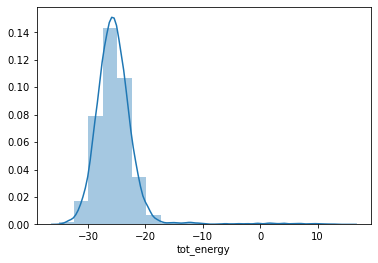

In [9]:
sns.distplot(df["tot_energy"], bins=20)
print(df['tot_energy'].mean())

-6.314986903005218


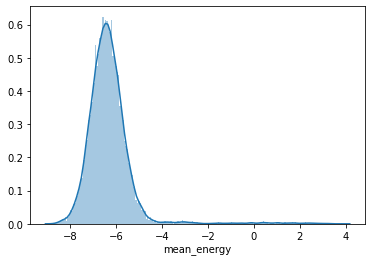

In [10]:
sns.distplot(df["mean_energy"], bins=200)
print(df['mean_energy'].mean())

-4.29109254453842


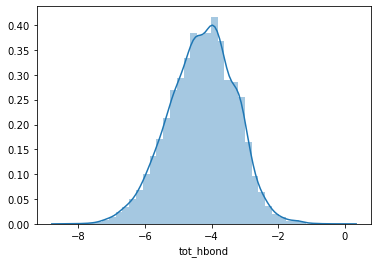

In [11]:
sns.distplot(df["tot_hbond"], bins=40)
print(df['tot_hbond'].mean())

-1.072773136134605


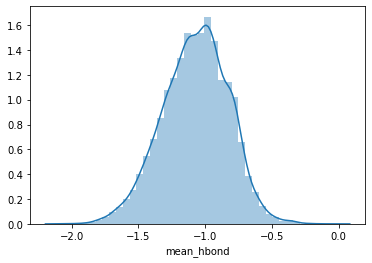

In [12]:
sns.distplot(df["mean_hbond"], bins=40)
print(df['mean_hbond'].mean())

2.64177489177


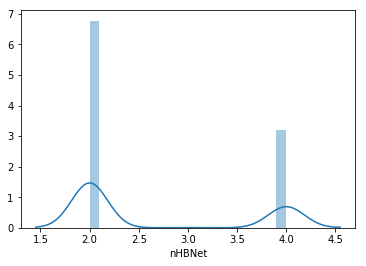

-13.951667570631635


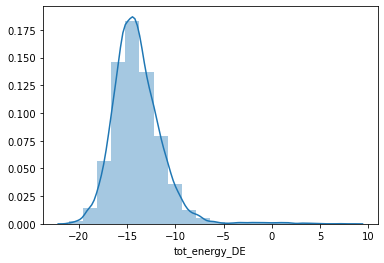

In [13]:
sns.distplot(df["tot_energy_DE"], bins=20)
print(df['tot_energy_DE'].mean())

-12.629973806010437


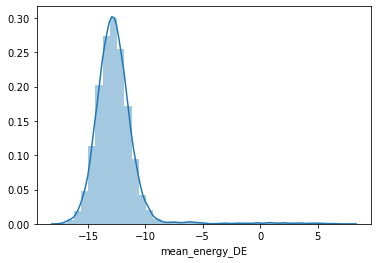

In [14]:
sns.distplot(df["mean_energy_DE"], bins=40)
print(df['mean_energy_DE'].mean())

-2.3584616303761017


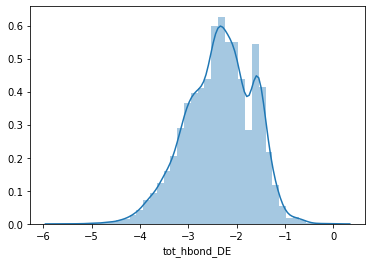

In [15]:
sns.distplot(df["tot_hbond_DE"], bins=40)
print(df['tot_hbond_DE'].mean())

-2.14554627226921


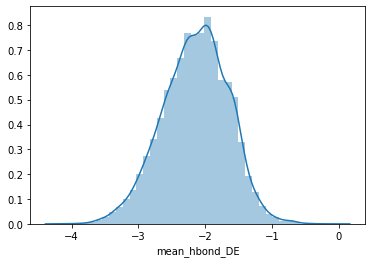

In [16]:
sns.distplot(df["mean_hbond_DE"], bins=40)
print(df['mean_hbond_DE'].mean())

# In terms of mean_energy, it does not really matter if we consider the full motif or the DE only. mean_energy_DE would only allow keeping a few of exta points along the secondary correlation line. It does not correlate with omega, rama_prepro or hbond_lr_bb.

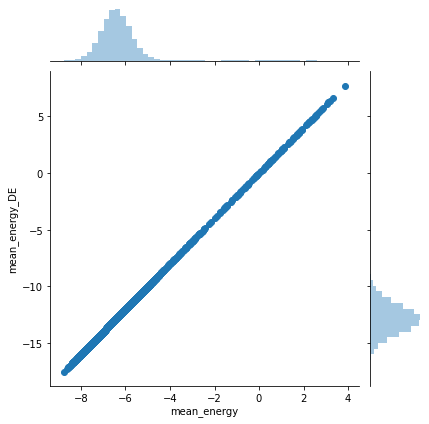

In [17]:
sns.jointplot("mean_energy", "mean_energy_DE", df);

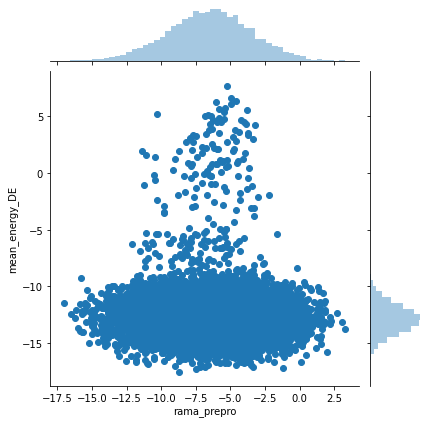

In [18]:
sns.jointplot("rama_prepro", "mean_energy_DE", df);

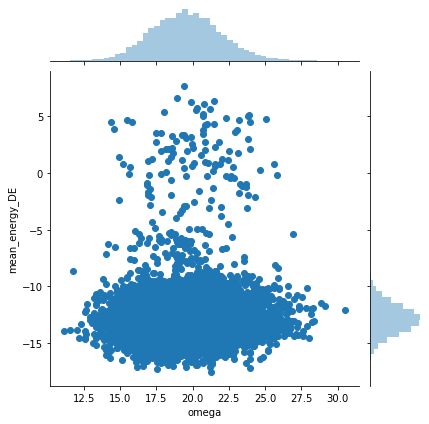

In [19]:
sns.jointplot("omega", "mean_energy_DE", df);

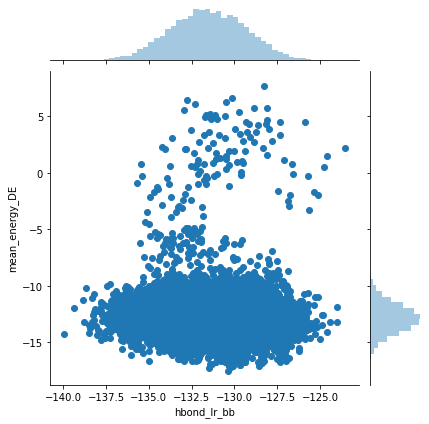

In [20]:
sns.jointplot("hbond_lr_bb", "mean_energy_DE", df);

# The cutoff of -1.8 mean_hbond_DE is more intuitive and will help keeping the variants along the secondary correlation axis. It does not correlate with omega, rama_prepro of hbond_lr_bb

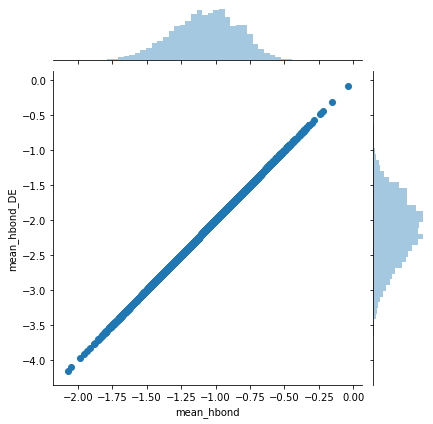

In [21]:
sns.jointplot("mean_hbond", "mean_hbond_DE", df);

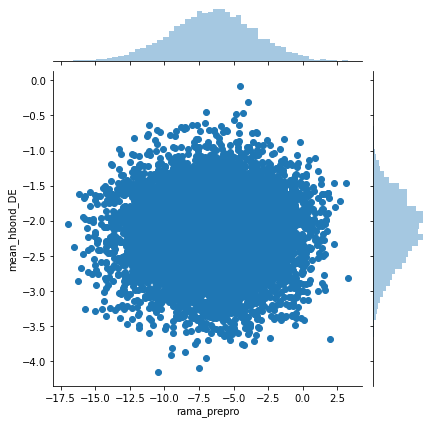

In [22]:
sns.jointplot("rama_prepro", "mean_hbond_DE", df);

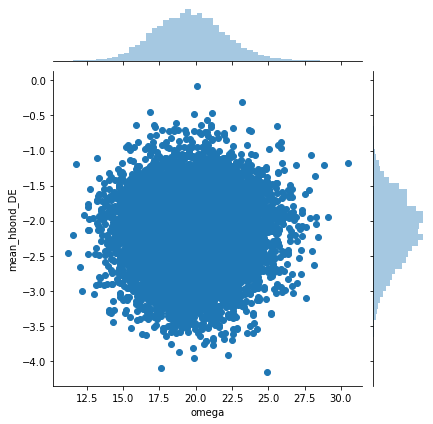

In [23]:
sns.jointplot("omega", "mean_hbond_DE", df);

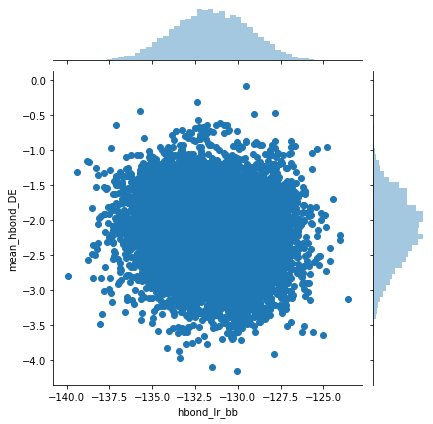

In [24]:
sns.jointplot("hbond_lr_bb", "mean_hbond_DE", df);

In [27]:
df.loc[(df['mean_energy_DE']<-10) & (df['omega']<=19) & (df['rama_prepro']<=-5) ].shape

(3070, 35)

In [28]:
df.loc[df['mean_hbond_DE']<-1.8].shape

(8365, 35)

In [31]:
df.loc[(df['mean_hbond_DE']<-1.8) & (df['mean_energy_DE']<-10) & (df['omega']<=18) & (df['rama_prepro']<=-5) & (df['hbond_lr_bb']<=-127.5)].shape

(1528, 35)

In [32]:
best_motif = df.loc[(df['mean_hbond_DE']<-1.8) & (df['mean_energy_DE']<-10) & (df['omega']<=18) & (df['rama_prepro']<=-5) & (df['hbond_lr_bb']<=-127.5)]
for model in best_motif.description:
    folder_id = "_".join(model.split("_")[0:4]) + "_" + model.split("_")[4][3:]
    source = folder_id + "/" + model + ".pdb"
    target = "../round2_fasol09_surf/" + model + ".pdb"
    copyfile(source, target)

18.16820712349981


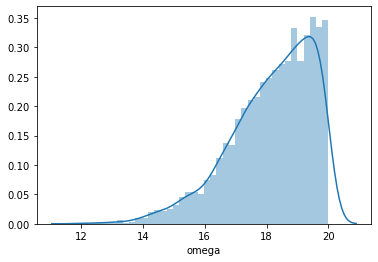

In [47]:
sns.distplot(best_motif["omega"], bins=40)
print(best_motif['omega'].mean())

-7.911161053039103


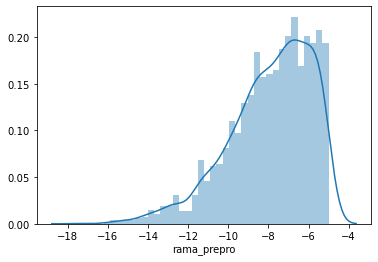

In [48]:
sns.distplot(best_motif["rama_prepro"], bins=40)
print(best_motif['rama_prepro'].mean())

-131.1085412311266


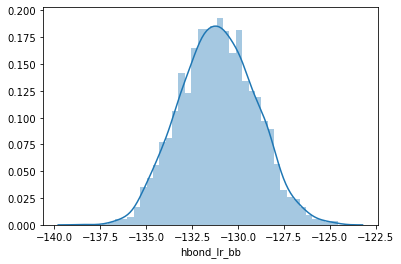

In [49]:
sns.distplot(best_motif["hbond_lr_bb"], bins=40)
print(best_motif['hbond_lr_bb'].mean())

In [118]:
df.loc[(df['mean_hbond_DE']>-1.8) & (df['mean_energy_DE']>-8.6)].shape

(1405, 32)

In [119]:
worst_motif = df.loc[(df['mean_hbond_DE']>-1.8) & (df['mean_energy_DE']>-8.6)]
for model in worst_motif.description:
    folder_id = "_".join(model.split("_")[0:6])
    source = folder_id + "/" + model + ".pdb"
    target = "worst_motif/" + model + ".pdb"
    copyfile(source, target)